In [110]:
# Notebook for article https://habrahabr.ru/post/328760/

In [118]:
import pandas as pnd
import numpy as nmp
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [120]:
def generateData(minValue, maxValue, N, dim):
    return minValue + nmp.random.rand(N, dim) * (maxValue - minValue)

def getCoefficients(text, regressor, X, y):
    regressor.fit(X, y)
    print(text, regressor.intercept_, regressor.coef_)
    print("error:", mean_squared_error(y, regressor.predict(X)))

In [125]:
N = 100
minValue = -10.0
maxValue = 10.0

alpha_1 = 0.1
alpha_2 = 0.5
alpha_3 = 0.7

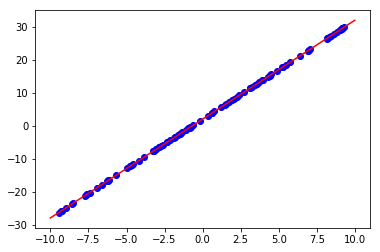

Ordinary: 2.0 [ 3.]
error: 6.22657773252e-30
Ridge for alpha = 0.1: 2.00002085365 [ 2.99989669]
error: 3.0991421129e-07
Ridge for alpha = 0.5: 2.00010425391 [ 2.99948353]
error: 7.74572127596e-06
Ridge for alpha = 0.7: 2.00014594543 [ 2.99927699]
error: 1.51795230227e-05
Lasso for alpha = 0.1: 2.00069514576 [ 2.99655627]
error: 0.000344372840962
Lasso for alpha = 0.5: 2.00347572878 [ 2.98278136]
error: 0.00860932102405
Lasso for alpha = 0.7: 2.00486602029 [ 2.9758939]
error: 0.0168742692071


In [121]:
# 1D without noise

X = generateData(minValue, maxValue, N, 1)
X1 = X[:, 0]
Y = 2 + 3 * X1
pnd.DataFrame({"x1": X1,
               "y": Y}).to_csv("../temp/1D_wo_noise.csv", index = False)

plt.scatter(X1, Y, color = "blue")
plt.plot([-10, 10], [-28, 32], color = "red")
plt.show()

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

In [122]:
# 5D without noise

X = generateData(minValue, maxValue, N, 5)
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
X4 = X[:, 3]
X5 = X[:, 4]
Y = X1 - 2 * X2 + 3 * X3 - 4 * X4 + 5 * X5
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "x3": X3,
               "x4": X4,
               "x5": X5,
               "y": Y}).to_csv("../temp/5D_wo_noise.csv", index = False)

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

Ordinary: -1.7763568394e-15 [ 1. -2.  3. -4.  5.]
error: 8.55693201111e-28
Ridge for alpha = 0.1: 0.000215876040206 [ 0.99994083 -1.99994942  2.99996583 -3.99985511  4.99982614]
error: 1.71161554857e-06
Ridge for alpha = 0.5: 0.00107915625943 [ 0.99970421 -1.99974712  2.99982915 -3.9992757   4.99913083]
error: 4.27787025934e-05
Ridge for alpha = 0.7: 0.00151066205123 [ 0.99958594 -1.99964598  2.99976079 -3.99898606  4.99878325]
error: 8.38348085645e-05
Lasso for alpha = 0.1: 0.0043137000802 [ 0.9965019  -1.99730682  2.99866353 -3.99655155  4.99606781]
error: 0.00149510012333
Lasso for alpha = 0.5: 0.0211426429449 [ 0.98273874 -1.98649773  2.9930903  -3.98289594  4.98039823]
error: 0.0372100001127
Lasso for alpha = 0.7: 0.0295571143773 [ 0.97585715 -1.98109319  2.99030369 -3.97606813  4.97256344]
error: 0.0729086122324


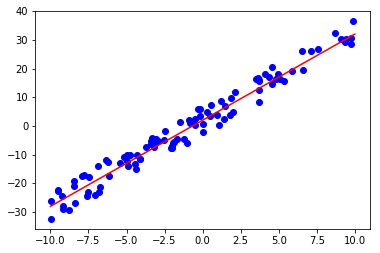

Ordinary: 2.50895215815 [ 3.04529866]
error: 8.76485532556
Ridge for alpha = 0.1: 2.50883485383 [ 3.04519387]
error: 8.76485564467
Ridge for alpha = 0.5: 2.50836571729 [ 3.04477478]
error: 8.76486330102
Ridge for alpha = 0.7: 2.50813119744 [ 3.04456528]
error: 8.76487095531
Lasso for alpha = 0.1: 2.50510004493 [ 3.04185749]
error: 8.76519944189
Lasso for alpha = 0.5: 2.48969159206 [ 3.02809284]
error: 8.77345823388
Lasso for alpha = 0.7: 2.48198736563 [ 3.02121051]
error: 8.78171702586


In [123]:
# 1D with noise

eps = 5.0
noise = generateData(-eps, eps, N, 1)[:, 0]

X = generateData(minValue, maxValue, N, 1)
X1 = X[:, 0]
Y = 2 + 3 * X1 + noise
pnd.DataFrame({"x1": X1,
               "y": Y}).to_csv("../temp/1D_w_noise.csv", index = False)
plt.scatter(X1, Y, color = "blue")
plt.plot([-10, 10], [-28, 32], color = "red")
plt.show()

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

In [124]:
# 3D with noise

eps = 5.0
noise = generateData(-eps, eps, N, 1)[:, 0]

X = generateData(-10.0, 10.0, 100, 3)
X1 = X[:, 0]
X2 = X[:, 1]
X3 = X[:, 2]
Y = X1 - 2 * X2 + 3 * X3 + noise
pnd.DataFrame({"x1": X1,
               "x2": X2,
               "x3": X3,
               "y": Y}).to_csv("../temp/3D_w_noise.csv", index = False)

getCoefficients("Ordinary:", LinearRegression(), X, Y)

getCoefficients("Ridge for alpha = 0.1:", Ridge(alpha_1), X, Y)
getCoefficients("Ridge for alpha = 0.5:", Ridge(alpha_2), X, Y)
getCoefficients("Ridge for alpha = 0.7:", Ridge(alpha_3), X, Y)

getCoefficients("Lasso for alpha = 0.1:", Lasso(alpha_1), X, Y)
getCoefficients("Lasso for alpha = 0.5:", Lasso(alpha_2), X, Y)
getCoefficients("Lasso for alpha = 0.7:", Lasso(alpha_3), X, Y)

Ordinary: 0.260028523918 [ 1.01369955 -1.96207393  2.95260992]
error: 7.85766411701
Ridge for alpha = 0.1: 0.259884719568 [ 1.01368339 -1.96201529  2.95251366]
error: 7.85766453264
Ridge for alpha = 0.5: 0.259309588968 [ 1.01361878 -1.96178076  2.95212869]
error: 7.85767450523
Ridge for alpha = 0.7: 0.259022075738 [ 1.01358648 -1.96166352  2.95193625]
error: 7.85768447538
Lasso for alpha = 0.1: 0.253445013464 [ 1.01130664 -1.95932713  2.94946339]
error: 7.85849270066
Lasso for alpha = 0.5: 0.227110322316 [ 1.00173276 -1.94834043  2.93687749]
error: 7.87838028212
Lasso for alpha = 0.7: 0.213942976742 [ 0.99694582 -1.94284708  2.93058453]
error: 7.89826802099
